# HOURLY ENERGY CONSUMPTION FORECAST

## DATASET LOADING

In [2]:
import pandas as pd

df = pd.read_excel(r"C:\Users\KRITIKA\Downloads\FORECASTING POWER SUPPLY DEMAND\PJMW_MW_Hourly(1016).xlsx")
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077
1,2002-12-31 02:00:00,4939
2,2002-12-31 03:00:00,4885
3,2002-12-31 04:00:00,4857
4,2002-12-31 05:00:00,4930


## EXPLORATORY DATA ANALYSIS

In [4]:
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077
1,2002-12-31 02:00:00,4939
2,2002-12-31 03:00:00,4885
3,2002-12-31 04:00:00,4857
4,2002-12-31 05:00:00,4930


In [6]:
df.shape

(143206, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  143206 non-null  datetime64[ns]
 1   PJMW_MW   143206 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 MB


In [10]:
df.describe()

,Datetime,PJMW_MW
count,143206,143206.000000
mean,2010-06-02 03:39:50.656816128,5602.375089
min,2002-04-01 01:00:00,487.000000
25%,2006-05-02 03:15:00,4907.000000
50%,2010-06-02 04:30:00,5530.000000
75%,2014-07-03 06:45:00,6252.000000
max,2018-08-03 00:00:00,9594.000000
std,NaN,979.142872


In [12]:
print(df.columns)

Index(['Datetime', 'PJMW_MW'], dtype='object')


In [14]:
null_values = df.isnull().sum()
print("NULL VALUES:", null_values)

NULL VALUES: Datetime    0
PJMW_MW     0
dtype: int64


In [16]:
# Check for duplicates
duplicate_rows = df.duplicated()

# How many duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

# If you want to see them
if duplicate_rows.sum() > 0:
    display(df[duplicate_rows])

Number of duplicate rows: 0


In [18]:
# Feature Engineering
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

# Define Season based on Month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Quick check
print(df.head())

             Datetime  PJMW_MW  Hour  Day  Month DayOfWeek  IsWeekend  Season
0 2002-12-31 01:00:00     5077     1   31     12   Tuesday          0  Winter
1 2002-12-31 02:00:00     4939     2   31     12   Tuesday          0  Winter
2 2002-12-31 03:00:00     4885     3   31     12   Tuesday          0  Winter
3 2002-12-31 04:00:00     4857     4   31     12   Tuesday          0  Winter
4 2002-12-31 05:00:00     4930     5   31     12   Tuesday          0  Winter


### Energy consumption by season

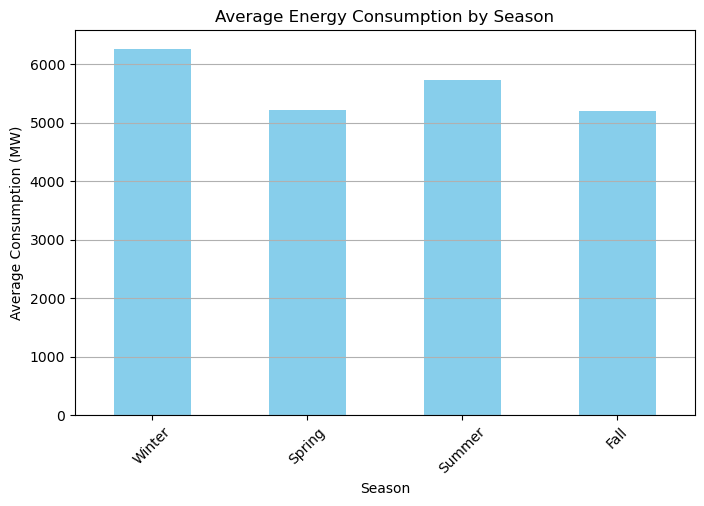

In [20]:
# Group by Season and calculate mean consumption
season_avg = df.groupby('Season')['PJMW_MW'].mean()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
season_avg = season_avg.reindex(['Winter', 'Spring', 'Summer', 'Fall'])  # Order the seasons
season_avg.plot(kind='bar', color='skyblue')
plt.title('Average Energy Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Average Consumption (MW)')
plt.grid(axis='y')
plt.xticks(rotation = 45)
plt.show()

### Energy consumption: Weekday vs Weekend

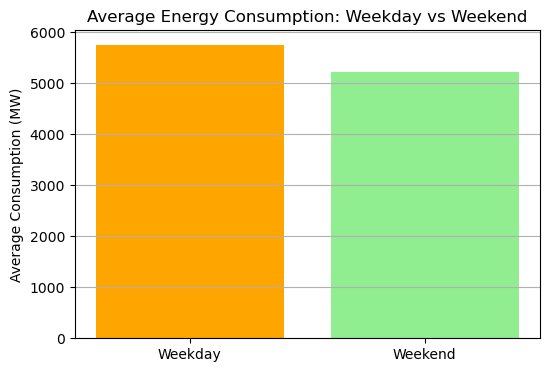

In [22]:
# Group by IsWeekend and calculate mean consumption
weekend_avg = df.groupby('IsWeekend')['PJMW_MW'].mean()

# Mapping 0 and 1 to labels
labels = ['Weekday', 'Weekend']

# Plotting
plt.figure(figsize=(6,4))
plt.bar(labels, weekend_avg, color=['orange', 'lightgreen'])
plt.title('Average Energy Consumption: Weekday vs Weekend')
plt.ylabel('Average Consumption (MW)')
plt.grid(axis='y')
plt.show()

### Energy consumption by Day of the week 

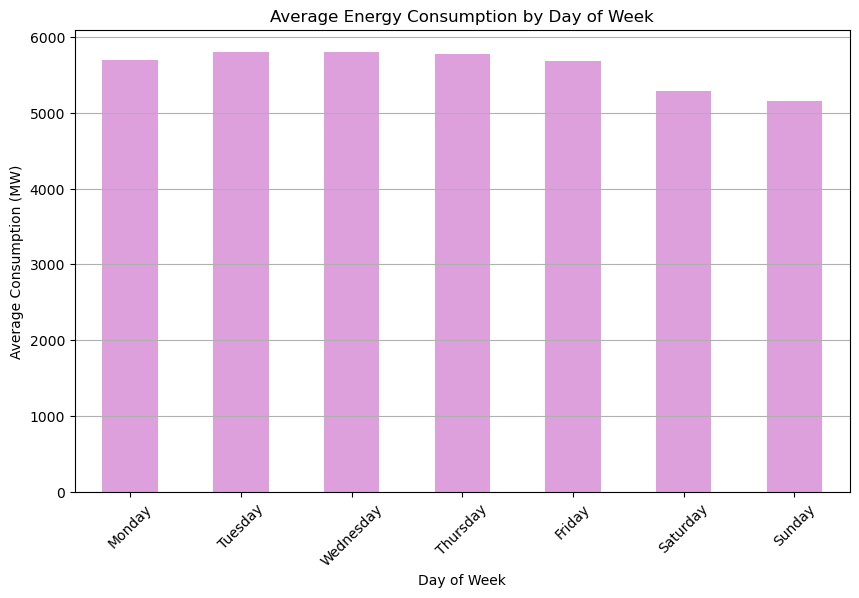

In [24]:
# Group by DayOfWeek and calculate mean consumption
dayofweek_avg = df.groupby('DayOfWeek')['PJMW_MW'].mean()

# Reordering days for proper sequence
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg = dayofweek_avg.reindex(ordered_days)

# Plotting
plt.figure(figsize=(10,6))
dayofweek_avg.plot(kind='bar', color='plum')
plt.title('Average Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Consumption (MW)')
plt.grid(axis='y')
plt.xticks(rotation = 45)
plt.show()

### Energy Consumption by Hour of Day

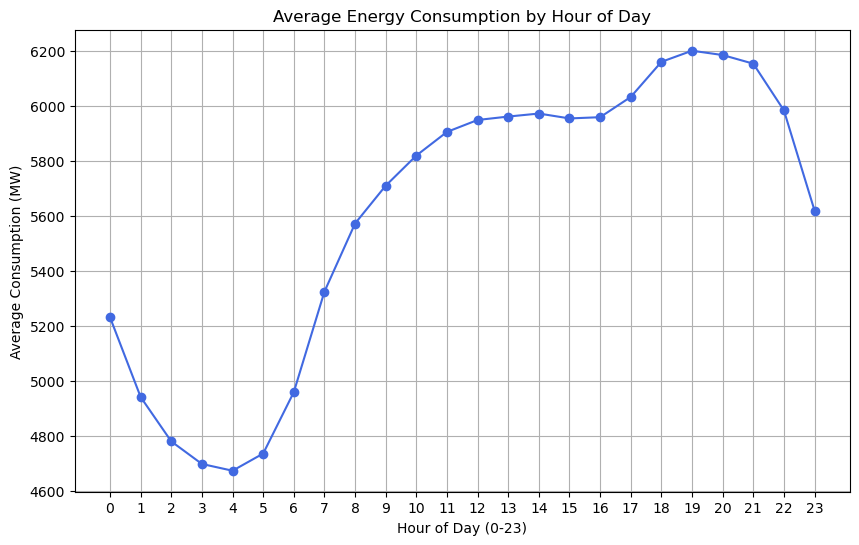

In [26]:
# Group by Hour and calculate mean consumption
hourly_avg = df.groupby('Hour')['PJMW_MW'].mean()

# Plotting
plt.figure(figsize=(10,6))
hourly_avg.plot(kind='line', marker='o', color='royalblue')
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Consumption (MW)')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

### Energy Consumption by Day of Month

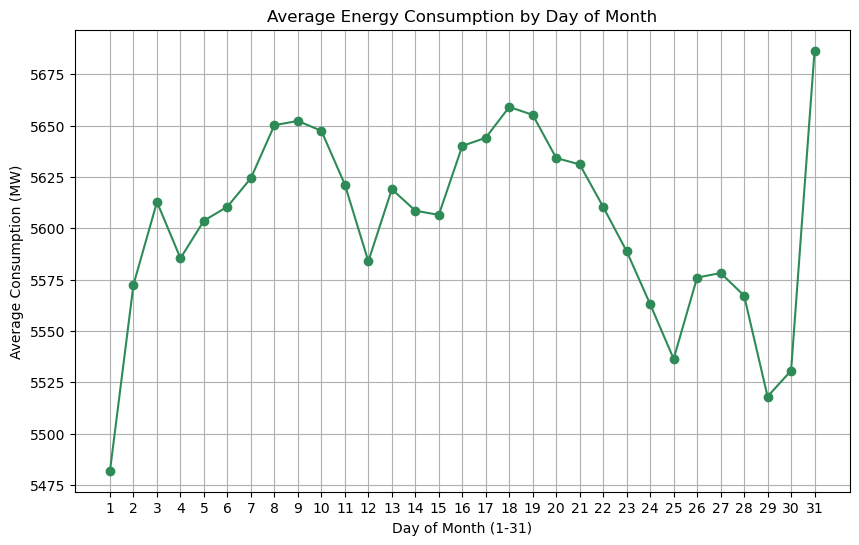

In [28]:
# Group by Day and calculate mean consumption
daily_avg = df.groupby('Day')['PJMW_MW'].mean()

# Plotting
plt.figure(figsize=(10,6))
daily_avg.plot(kind='line', marker='o', color='seagreen')
plt.title('Average Energy Consumption by Day of Month')
plt.xlabel('Day of Month (1-31)')
plt.ylabel('Average Consumption (MW)')
plt.grid(True)
plt.xticks(range(1,32))
plt.show()

### Energy Consumption by Month

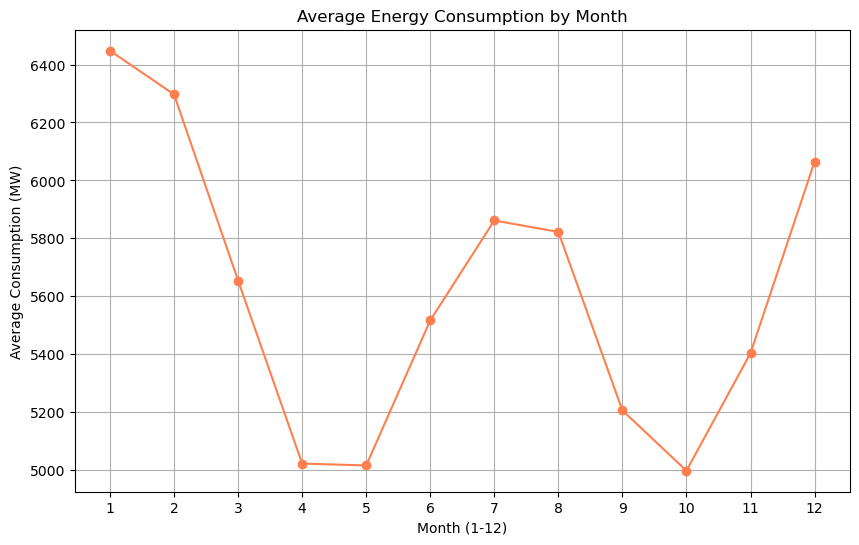

In [30]:
# Group by Month and calculate mean consumption
monthly_avg = df.groupby('Month')['PJMW_MW'].mean()

# Plotting
plt.figure(figsize=(10,6))
monthly_avg.plot(kind='line', marker='o', color='coral')
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month (1-12)')
plt.ylabel('Average Consumption (MW)')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

### Monthly Average Energy Consumption Over Years

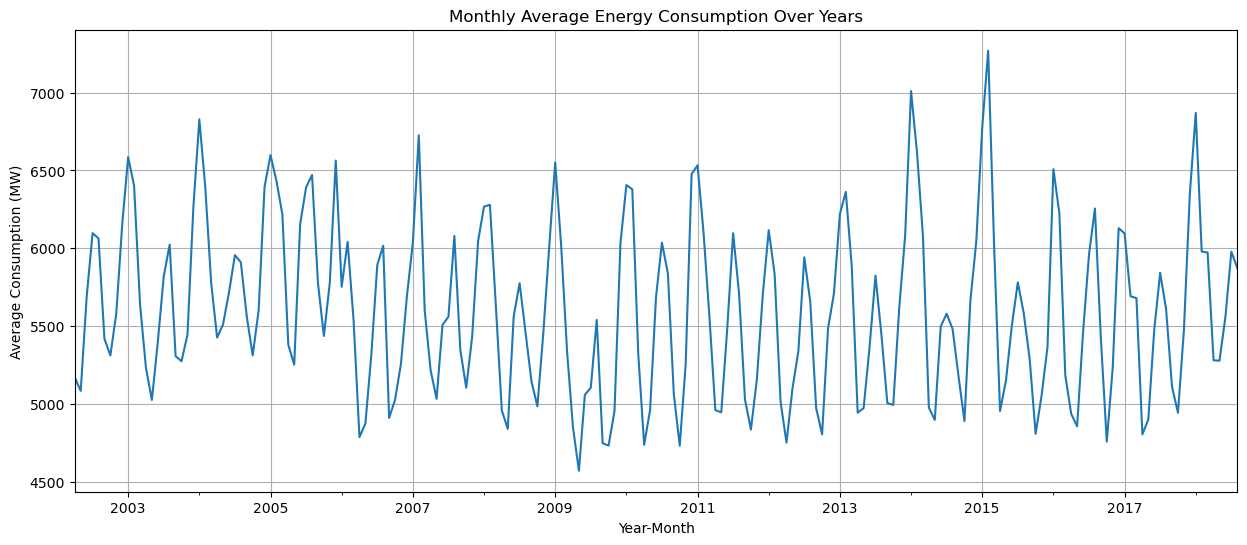

In [32]:
# Create a new column 'YearMonth' for easier grouping
df['YearMonth'] = df['Datetime'].dt.to_period('M')

# Group by YearMonth and calculate mean consumption
monthly_avg = df.groupby('YearMonth')['PJMW_MW'].mean()

# Plotting
plt.figure(figsize=(15,6))
monthly_avg.plot()
plt.title('Monthly Average Energy Consumption Over Years')
plt.xlabel('Year-Month')
plt.ylabel('Average Consumption (MW)')
plt.grid(True)
plt.show()

In [34]:
# printing minimum and maximum datetime

print(df['Datetime'].min())
print(df['Datetime'].max())

2002-04-01 01:00:00
2018-08-03 00:00:00


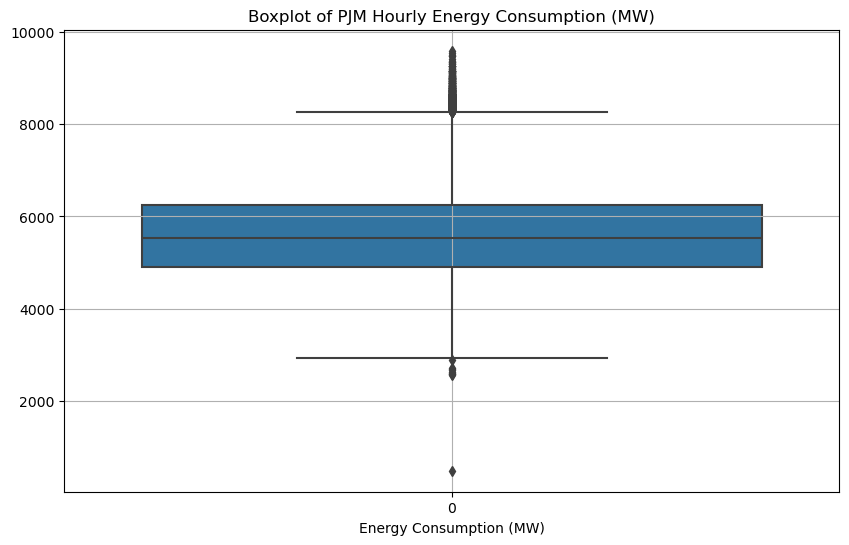

In [36]:
import seaborn as sns

# Boxplot to check outliers visually
plt.figure(figsize=(10,6))
sns.boxplot(data=df['PJMW_MW'])
plt.title('Boxplot of PJM Hourly Energy Consumption (MW)')
plt.xlabel('Energy Consumption (MW)')
plt.grid()
plt.show()

In [38]:
# Detecting outliers using the IQR method

# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['PJMW_MW'].quantile(0.25)
Q3 = df['PJMW_MW'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find outliers
outliers = df[(df['PJMW_MW'] < lower_bound) | (df['PJMW_MW'] > upper_bound)]

# Results
outliers_count = outliers.shape[0]
outliers_percentage = (outliers_count / df.shape[0]) * 100

outliers_count, outliers_percentage

(703, 0.4909012192226583)

In [40]:
# Make a copy of original dataframe
df_cleaned = df.copy()

# Remove suspiciously low values (<1000 MW)
df_cleaned = df_cleaned[df_cleaned['PJMW_MW'] >= 1000]

print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")

Original dataset size: 143206 rows
Cleaned dataset size: 143205 rows
Rows removed: 1


In [42]:
print(df.head())
print(df.dtypes)

             Datetime  PJMW_MW  Hour  Day  Month DayOfWeek  IsWeekend  Season  \
0 2002-12-31 01:00:00     5077     1   31     12   Tuesday          0  Winter   
1 2002-12-31 02:00:00     4939     2   31     12   Tuesday          0  Winter   
2 2002-12-31 03:00:00     4885     3   31     12   Tuesday          0  Winter   
3 2002-12-31 04:00:00     4857     4   31     12   Tuesday          0  Winter   
4 2002-12-31 05:00:00     4930     5   31     12   Tuesday          0  Winter   

  YearMonth  
0   2002-12  
1   2002-12  
2   2002-12  
3   2002-12  
4   2002-12  
Datetime     datetime64[ns]
PJMW_MW               int64
Hour                  int32
Day                   int32
Month                 int32
DayOfWeek            object
IsWeekend             int32
Season               object
YearMonth         period[M]
dtype: object


## MODEL BUILDING

Training Set: (142841, 8)
Testing Set: (365, 8)


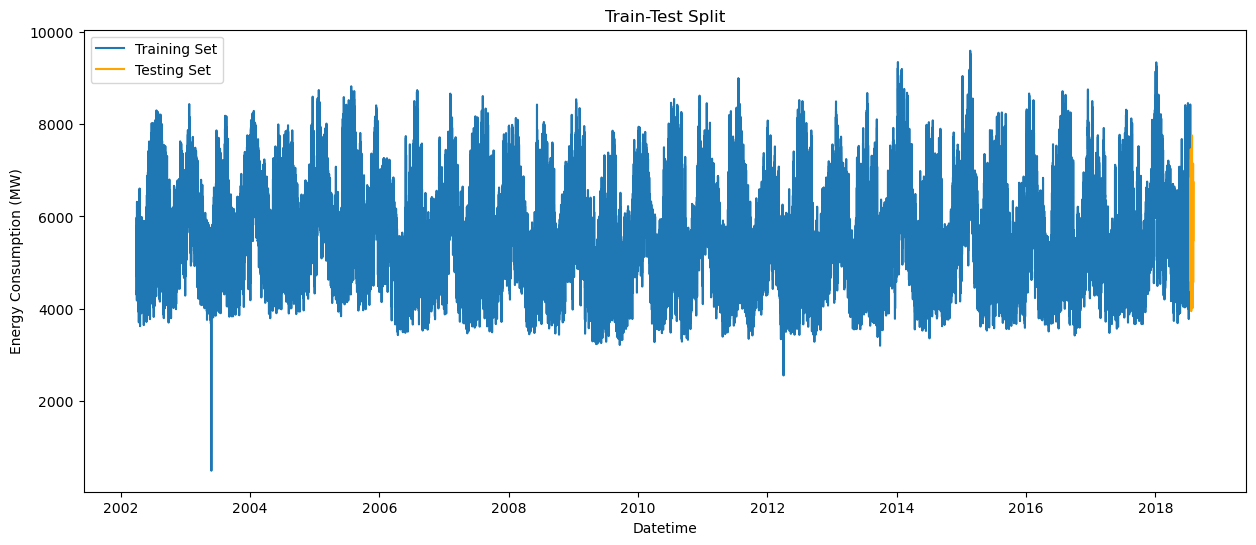

In [44]:
# Convert 'Datetime' to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the data by datetime just in case
df = df.sort_values('Datetime')

# Set 'Datetime' as index for time series modeling
df.set_index('Datetime', inplace=True)

# Split the dataset: last 365 days for testing
train = df.loc[:df.index[-366]]  # Everything except last 365 days
test = df.loc[df.index[-365]:]   # Last 365 days

# Quick check
print("Training Set:", train.shape)
print("Testing Set:", test.shape)

# Optional: visualize the split
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(train.index, train['PJMW_MW'], label='Training Set')
plt.plot(test.index, test['PJMW_MW'], label='Testing Set', color='orange')
plt.legend()
plt.title('Train-Test Split')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()

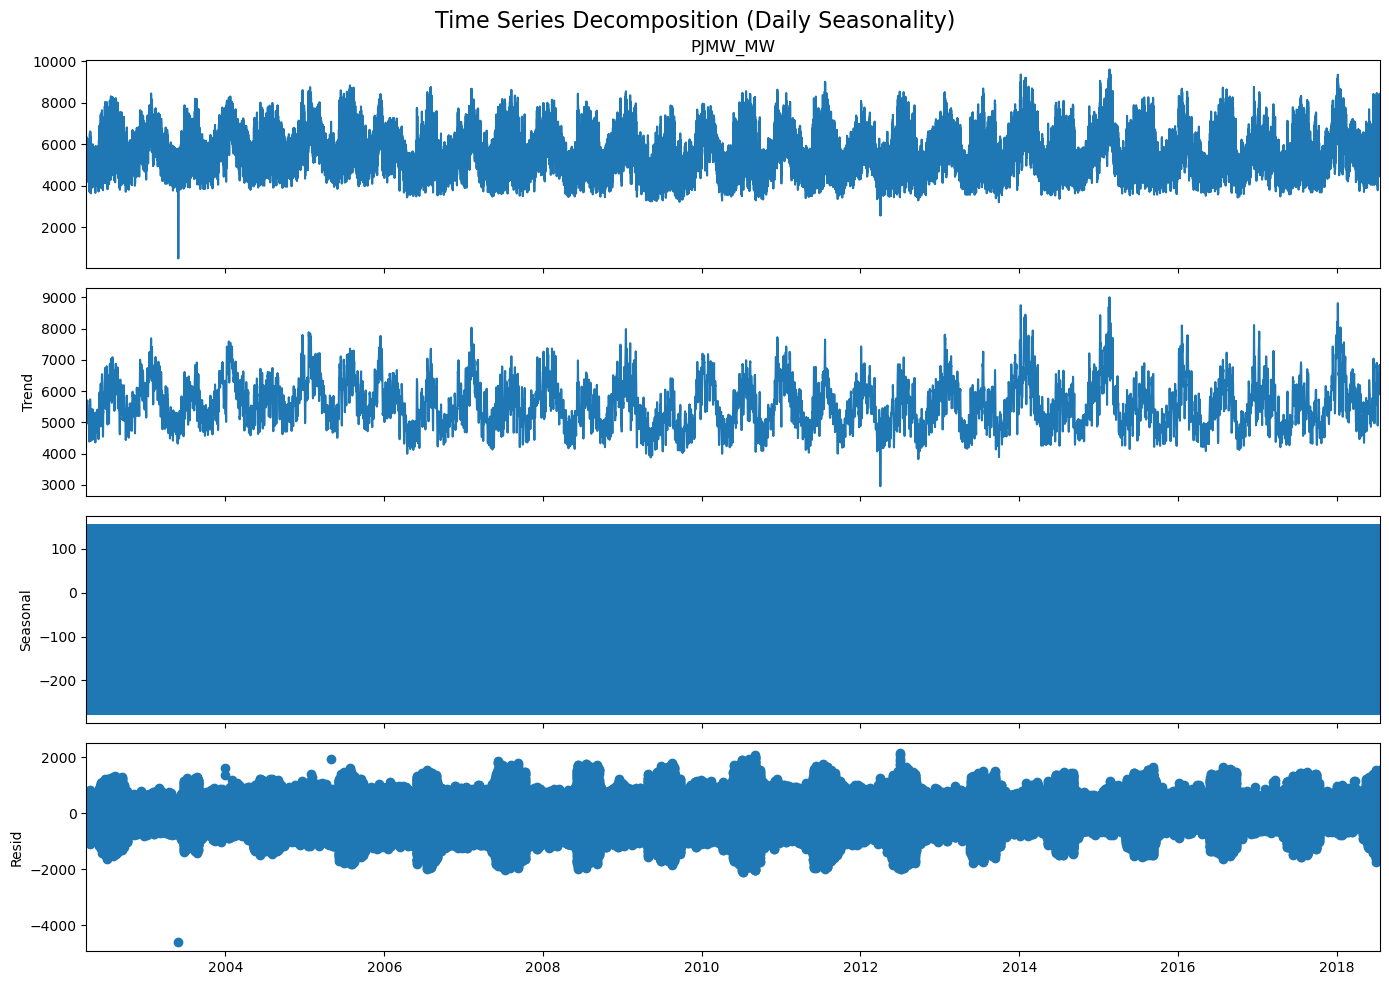

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming your training set is called 'train' and has 'Datetime' as index
# Decompose the time series with daily seasonality (24 hours)
decomposition = seasonal_decompose(train['PJMW_MW'], model='additive', period=24)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition (Daily Seasonality)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [46]:
print(train.columns)

Index(['PJMW_MW', 'Hour', 'Day', 'Month', 'DayOfWeek', 'IsWeekend', 'Season',
       'YearMonth'],
      dtype='object')


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature engineering
df_ml = df_cleaned.copy()
df_ml['lag1'] = df_ml['PJMW_MW'].shift(1)
df_ml['rolling_mean_24'] = df_ml['PJMW_MW'].rolling(window=24).mean()
df_ml.dropna(inplace=True)

df_ml['Datetime'] = df_cleaned['Datetime'].iloc[-len(df_ml):].values
df_ml.set_index('Datetime', inplace=True)

# Features and target
X = df_ml[['Hour', 'Day', 'Month', 'lag1', 'rolling_mean_24']]
y = df_ml['PJMW_MW']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=365*24)

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import numpy as np

models = {
    "XGBoost": xgb.XGBRegressor(n_estimators=200, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "Linear Regression": LinearRegression(),
    "LightGBM": lgb.LGBMRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: RMSE = {rmse:.2f}")

XGBoost: RMSE = 138.65
Random Forest: RMSE = 135.88
Gradient Boosting: RMSE = 162.50
Linear Regression: RMSE = 238.24
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 134422, number of used features: 5
[LightGBM] [Info] Start training from score 5597.598793
LightGBM: RMSE = 139.11


MAE on Test Set: 81.58
RMSE on Test Set: 139.64


C:\Users\KRITIKA\AppData\Local\Temp\ipykernel_32672\3587142283.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df_ml.index.max() + pd.Timedelta(hours=1), periods=30*24, freq='H')


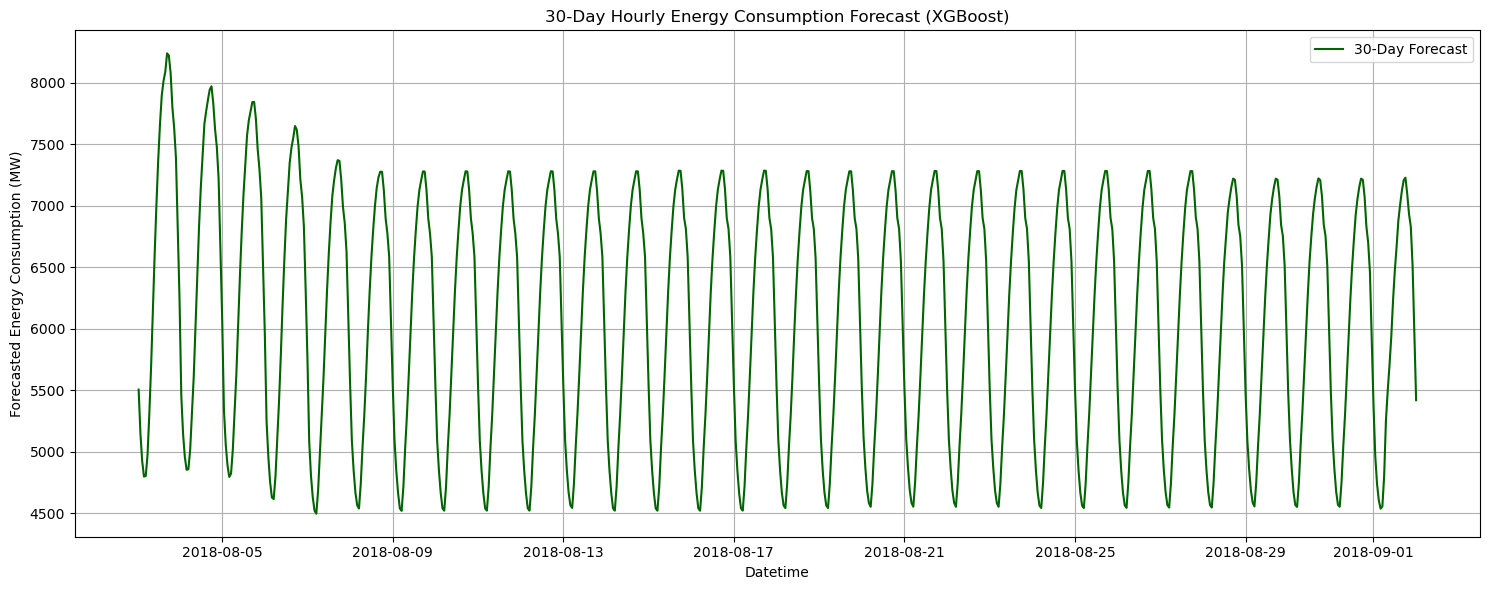

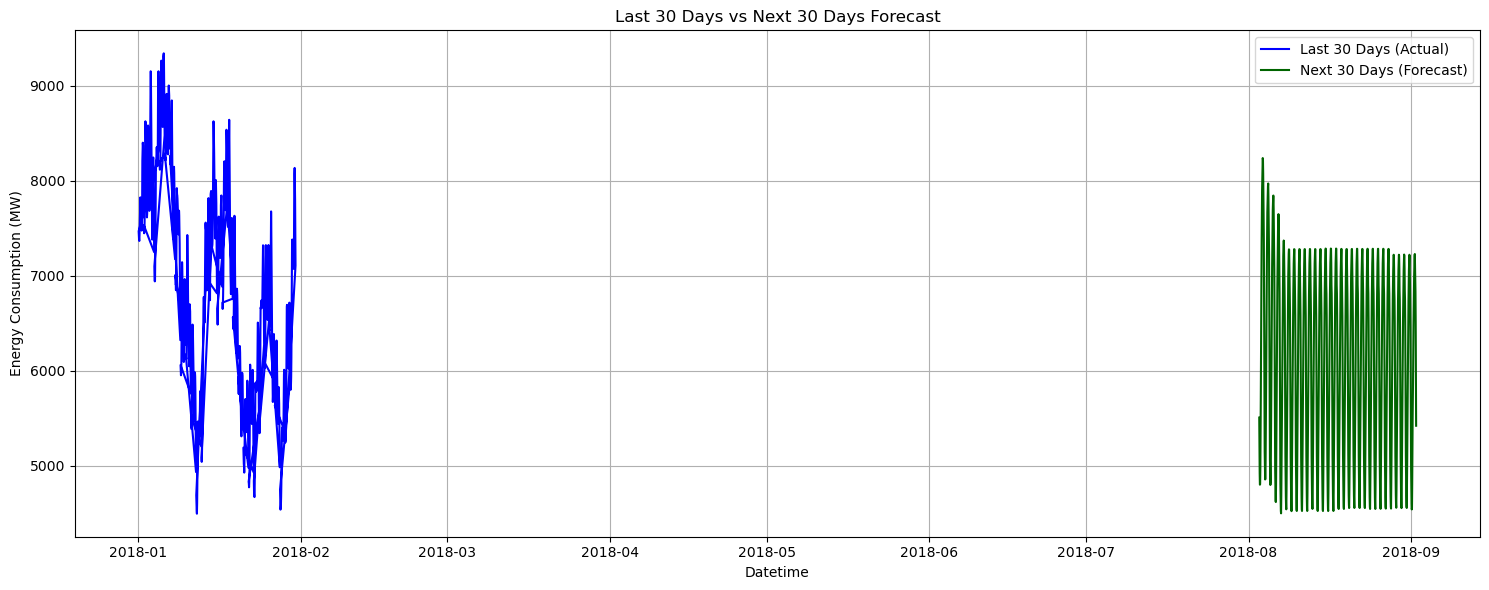

In [55]:
model = xgb.XGBRegressor(
    n_estimators=500,       # Number of trees
    learning_rate=0.05,     # Smaller learning rate
    max_depth=6,            # Deeper trees, but not too deep
    subsample=0.8,          # Randomly sample 80% rows
    colsample_bytree=0.8,   # Randomly sample 80% columns per tree
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all CPU cores
)

model.fit(X_train, y_train)

# --- Evaluate on Test Set ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE on Test Set: {mae:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")

# --- 30-Day Forecast ---
# Start from last known row
last_row = df_ml.iloc[-1].copy()

# Future datetime range
future_dates = pd.date_range(start=df_ml.index.max() + pd.Timedelta(hours=1), periods=30*24, freq='H')
future_df = pd.DataFrame(index=future_dates)

# Predict recursively
future_preds = []

for date in future_dates:
    hour = date.hour
    day = date.day
    month = date.month
    lag1 = last_row['PJMW_MW']
    
    if len(future_preds) >= 23:
        last_rolling = future_preds[-23:] + [lag1]
    else:
        real_data = df_ml['PJMW_MW'].iloc[-(24 - len(future_preds)):]
        last_rolling = real_data.tolist() + future_preds
    
    rolling_mean_24 = np.mean(last_rolling)
    
    features = pd.DataFrame([[hour, day, month, lag1, rolling_mean_24]], 
                            columns=['Hour', 'Day', 'Month', 'lag1', 'rolling_mean_24'])

    pred = model.predict(features)[0]
    
    future_preds.append(pred)
    last_row['PJMW_MW'] = pred

# Save forecast
future_df['Forecast_PJMW_MW'] = future_preds

# --- Plot 30-Day Forecast ---
plt.figure(figsize=(15,6))
plt.plot(future_df.index, future_df['Forecast_PJMW_MW'], color='darkgreen', label='30-Day Forecast')
plt.title('30-Day Hourly Energy Consumption Forecast (XGBoost)')
plt.xlabel('Datetime')
plt.ylabel('Forecasted Energy Consumption (MW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Overlay Last 30 Days + Forecast ---
historical_tail = df_ml['PJMW_MW'].tail(30*24)

plt.figure(figsize=(15,6))
plt.plot(historical_tail.index, historical_tail.values, label='Last 30 Days (Actual)', color='blue')
plt.plot(future_df.index, future_df['Forecast_PJMW_MW'], label='Next 30 Days (Forecast)', color='darkgreen')
plt.title('Last 30 Days vs Next 30 Days Forecast')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define parameter space (adjusted to be smaller for memory efficiency)
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# XGBoost Regressor with more memory-efficient settings
xgb_model = xgb.XGBRegressor(
    random_state=42,
    n_jobs=1,  # prevent overloading memory
    tree_method='hist'  # change to 'gpu_hist' if you have a compatible GPU
)

# RandomizedSearchCV with fewer iterations and single-threaded execution
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # reduce number of parameter combinations
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=1  # single thread to conserve RAM
)

# Fit the model
random_search.fit(X_train, y_train)

# Output the best parameters and best model
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [61]:
import joblib

joblib.dump(best_model, 'xgb_pjm_model.pkl')
print("Model saved!")

Model saved!
